In [1]:
import hms_csv
import pandas as pd

# HECHMS Time Series

Time series exported from HECHMS can be saved as CSV file

```
datetime,Node1,Node2,Node3
01Jun2007  0000,0,0,0
01Jun2007  0005,0.023,0.04,0.014
01Jun2007  0010,0.107,0.17,0.065
01Jun2007  0015,0.268,0.45,0.162
```

We'll go through a few examples on how to process this csv file.

# Date Time Format

Refer to [python doc](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) for more information on changing the format for date and time.


In [2]:
import datetime

t = datetime.datetime(2001, 1, 1, 10, 20, 36)
for f in ['%a %d %b %Y, %I:%M%p', '%d%b%Y  %H%M', '%m/%d/%Y %H:%M', '%Y-%m-%d %H:%M:%S']:
    print('{}  ({})'.format(t.strftime(f), f))


Mon 01 Jan 2001, 10:20AM  (%a %d %b %Y, %I:%M%p)
01Jan2001  1020  (%d%b%Y  %H%M)
01/01/2001 10:20  (%m/%d/%Y %H:%M)
2001-01-01 10:20:36  (%Y-%m-%d %H:%M:%S)


In [3]:
# read the CSV file
csv_path = './data/hms.csv'
df = hms_csv.read_hms_csv(csv_path, datetime_fld='datetime', date_format='%d%b%Y  %H%M')
print(df)

          datetime  Node1  Node2  Node3                  dt      hour
0  01Jun2007  0000  0.000   0.00  0.000 2007-06-01 00:00:00  0.000000
1  01Jun2007  0005  0.023   0.04  0.014 2007-06-01 00:05:00  0.083333
2  01Jun2007  0010  0.107   0.17  0.065 2007-06-01 00:10:00  0.166667
3  01Jun2007  0015  0.268   0.45  0.162 2007-06-01 00:15:00  0.250000


2024-02-07 15:37:17,088 281:  matplotlib data path: c:\Users\mengm\Anaconda3\envs\ai\lib\site-packages\matplotlib\mpl-data
2024-02-07 15:37:17,093 281:  CONFIGDIR=C:\Users\mengm\.matplotlib
2024-02-07 15:37:17,094 1456:  interactive is False
2024-02-07 15:37:17,095 1457:  platform is win32
2024-02-07 15:37:17,175 281:  CACHEDIR=C:\Users\mengm\.matplotlib
2024-02-07 15:37:17,178 1629:  Using fontManager instance from C:\Users\mengm\.matplotlib\fontlist-v330.json
2024-02-07 15:37:17,347 316:  Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-02-07 15:37:17,349 316:  Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-02-07 15:37:17,350 1467:  findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2024-02-07 15:37:17,351 1479:  findfont: score(FontEntry(fname='c:\\Users\\mengm\\Anaconda3\\envs\\ai\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-Oblique.ttf', name='Deja

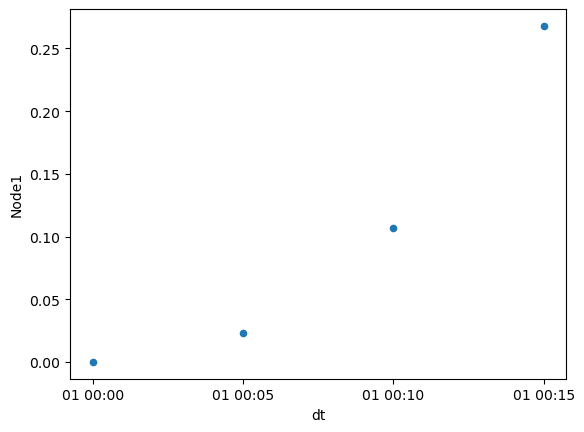

In [4]:
df.plot.scatter(x='dt', y='Node1');

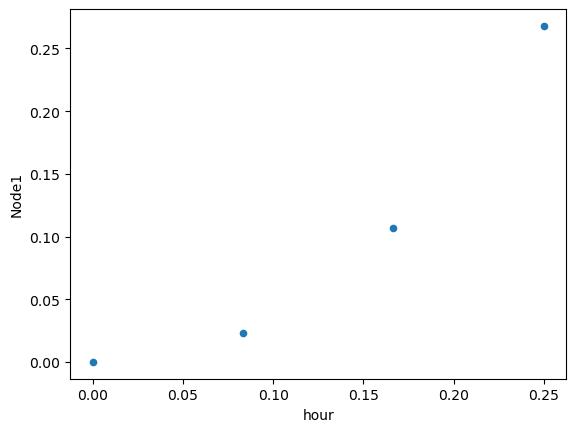

In [5]:
df.plot.scatter(x='hour', y='Node1');

# Export as inflow in XPX format 
For XPSWMM, you can export the data as inflow time series with hour/flow pairs.

In [6]:
xpx_path = './data/inflow.xpx'
hms_csv.hms_csv_to_xpx(csv_path, xpx_path, datetime_fld='datetime', date_format='%d%b%Y  %H%M')

In [7]:
with open(xpx_path) as f:
    for l in f:
        print(l)

DATA INQ "Node1" 0 1 1

DATA TEO "Node1" 0 4 0.0 0.08333333333333333 0.16666666666666666 0.25

DATA QCARD "Node1" 0 4 0.0 0.023 0.107 0.268

DATA INQ "Node2" 0 1 1

DATA TEO "Node2" 0 4 0.0 0.08333333333333333 0.16666666666666666 0.25

DATA QCARD "Node2" 0 4 0.0 0.04 0.17 0.45

DATA INQ "Node3" 0 1 1

DATA TEO "Node3" 0 4 0.0 0.08333333333333333 0.16666666666666666 0.25

DATA QCARD "Node3" 0 4 0.0 0.014 0.065 0.162



# Long table format

A commonly used format is long format.

In [30]:
 #save csv as long table
out_csv_path = './data/long.csv'
hms_csv.long_table(csv_path, out_csv_path, datetime_fld='datetime', date_format='%d%b%Y  %H%M', time_column='dt')
df = pd.read_csv(out_csv_path)

In [31]:
df

,DATE,TIME,FLOW,STATION
0,06/01/2007,00:00,0.000,Node1
1,06/01/2007,00:05,0.023,Node1
2,06/01/2007,00:10,0.107,Node1
3,06/01/2007,00:15,0.268,Node1
4,06/01/2007,00:00,0.000,Node2
5,06/01/2007,00:05,0.040,Node2
6,06/01/2007,00:10,0.170,Node2
7,06/01/2007,00:15,0.450,Node2
8,06/01/2007,00:00,0.000,Node3
9,06/01/2007,00:05,0.014,Node3


# Gagued Flow XPX

In [32]:
#create the gauged inflow xpx 
xpx_path = './data/gauged.xpx'
long_csv_path = r"C:\tmp\gauged\long.csv" #'./data/long.csv'
file_format = 'inflow'
hms_csv.gauged_inflow_xpx(xpx_path, long_csv_path, file_format, station_field='STATION')

2024-02-07 15:46:38,005 125:  write line for node: Node1
2024-02-07 15:46:38,006 125:  write line for node: Node2
2024-02-07 15:46:38,006 125:  write line for node: Node3
2024-02-07 15:46:38,008 126:  xpx saved to: ./data/gauged.xpx


In [33]:
i = 0
with open(xpx_path) as f:
    for l in f:
        i += 1
        print(l)
        if i > 5: break

DATA UDFS_FILE "Node1" 0 1 "C:\tmp\gauged\long.csv" 

DATA R_UDFS_FMTNAME "Node1" 0 1 "inflow" 

DATA GINFLOW "Node1" 0 1 1

DATA UDFS_STN "Node1" 0 1 "Node1"

DATA UDFS_FILE "Node2" 0 1 "C:\tmp\gauged\long.csv" 

DATA R_UDFS_FMTNAME "Node2" 0 1 "inflow" 

